# Group Assignment

This is the final notebook to get you started on the group assignment. After this, you should be able to solve all the base exercises for the group assignment. However, don't hold back to use externel data and packages to get additional insights for your case. Also keep in mind that you will have to present for the board of directors of the organization so don't make your presentation too technical! Your code will be reviewed through your GitHub repo so that is the technical part of the assignment, delivering the insights that you found should be done in the presentation.

### Plotting

In [1]:
# get needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in csv file
facilities = pd.read_csv("../data/facilities.csv")

# show
facilities.head(5)

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,http://irail.be/stations/NMBS/008734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://irail.be/stations/NMBS/008015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://irail.be/stations/NMBS/008895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,http://irail.be/stations/NMBS/008895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://irail.be/stations/NMBS/008891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00


Let's assume you want to visualize how the number of facilities is distributed across the various stations.

In [3]:
# check all column names
facilities.columns

Index(['URI', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday'],
      dtype='object')

In [4]:
# create list of facility columns
facil_col = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
             'bus', 'tram', 'metro', 'wheelchair_available', 'ramp', 'disabled_parking_spots', 'elevated_platform', 
             'escalator_up', 'escalator_down', 'elevator_platform', 'audio_induction_loop']

In [5]:
# for the sake of this exercise, we will simply impute all missing values of the facilities with zero
for col in facil_col:
    facilities[col].fillna((0), inplace=True)

# check if it worked    
for col in facilities.columns:
    missings = len(facilities[col][facilities[col].isnull()]) / float(len(facilities))
    print(col, missings)

URI 0.0
name 0.0
street 0.17210682492581603
zip 0.17359050445103857
city 0.17359050445103857
ticket_vending_machine 0.0
luggage_lockers 0.0
free_parking 0.0
taxi 0.0
bicycle_spots 0.0
blue-bike 0.0
bus 0.0
tram 0.0
metro 0.0
wheelchair_available 0.0
ramp 0.0
disabled_parking_spots 0.0
elevated_platform 0.0
escalator_up 0.0
escalator_down 0.0
elevator_platform 0.0
audio_induction_loop 0.0
sales_open_monday 0.7997032640949555
sales_close_monday 0.7997032640949555
sales_open_tuesday 0.7997032640949555
sales_close_tuesday 0.7997032640949555
sales_open_wednesday 0.7997032640949555
sales_close_wednesday 0.7997032640949555
sales_open_thursday 0.7997032640949555
sales_close_thursday 0.7997032640949555
sales_open_friday 0.7997032640949555
sales_close_friday 0.7997032640949555
sales_open_saturday 0.8738872403560831
sales_close_saturday 0.8738872403560831
sales_open_sunday 0.8961424332344213
sales_close_sunday 0.8961424332344213


In [6]:
# check frequency of each variable
facilities["disabled_parking_spots"].value_counts()

0.0     462
2.0      77
1.0      43
3.0      36
4.0      28
5.0      10
7.0       5
6.0       4
13.0      2
8.0       2
10.0      2
24.0      1
9.0       1
12.0      1
Name: disabled_parking_spots, dtype: int64

In [7]:
# PROBLEM: disabled_parking_spots is the number of spots instead of a dummy indicator
# so let's create a dummy variable
facilities['disabled_parking_spots_indicator'] = np.where(facilities['disabled_parking_spots']==0,0,1)

In [8]:
# drop old variable and add new name to our list
facil_col.remove('disabled_parking_spots')
facil_col = facil_col + ['disabled_parking_spots_indicator']

In [9]:
# show
facil_col

['ticket_vending_machine',
 'luggage_lockers',
 'free_parking',
 'taxi',
 'bicycle_spots',
 'blue-bike',
 'bus',
 'tram',
 'metro',
 'wheelchair_available',
 'ramp',
 'elevated_platform',
 'escalator_up',
 'escalator_down',
 'elevator_platform',
 'audio_induction_loop',
 'disabled_parking_spots_indicator']

In [10]:
# show columns of interest
facilities[facil_col]

,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,blue-bike,bus,tram,metro,wheelchair_available,ramp,elevated_platform,escalator_up,escalator_down,elevator_platform,audio_induction_loop,disabled_parking_spots_indicator
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
670,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
672,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
# compute total number of facilities per station
facilities['number_facilities'] = facilities[facil_col].sum(axis = 1)

In [12]:
# show
facilities['number_facilities'] 

0       0.0
1       0.0
2      12.0
3       1.0
4       7.0
       ... 
669     3.0
670     8.0
671     0.0
672     3.0
673     4.0
Name: number_facilities, Length: 674, dtype: float64

In [13]:
# prepare data for number of facilities in different stations
input_plot = pd.DataFrame(facilities['number_facilities'].value_counts())

In [14]:
# show
input_plot

,number_facilities
0.0,141
2.0,112
3.0,94
1.0,84
4.0,50
6.0,42
5.0,40
8.0,31
7.0,29
9.0,16


In [15]:
# prepare dataset as input for pyplot because we want two columns to make a plot
input_plot['NumberFacilities'] = input_plot.index
input_plot = input_plot.rename(index=str, columns={'number_facilities': 'Occurence'})

In [16]:
# show
input_plot

,Occurence,NumberFacilities
0.0,141,0.0
2.0,112,2.0
3.0,94,3.0
1.0,84,1.0
4.0,50,4.0
6.0,42,6.0
5.0,40,5.0
8.0,31,8.0
7.0,29,7.0
9.0,16,9.0


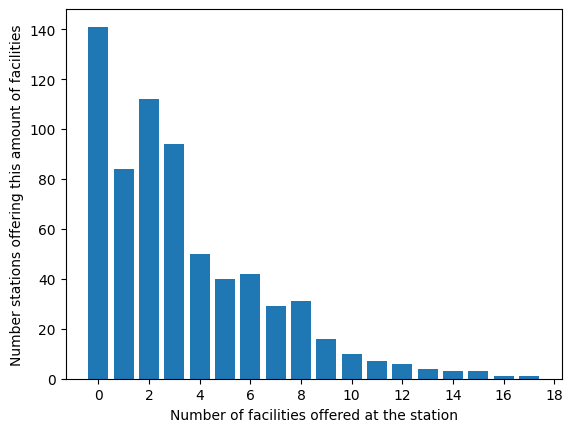

In [17]:
# time to get plotting
fig, ax = plt.subplots()
plt.bar(input_plot['NumberFacilities'], input_plot['Occurence'])
plt.locator_params(axis='x', nbins=len(input_plot))
plt.xlabel('Number of facilities offered at the station')
plt.ylabel('Number stations offering this amount of facilities')
plt.show()

While this is a very simple plot, it already gives some useful information. It seems that a lot of stations offer between 0 and 3 facilties. Others offer an intermediate amount between 4 and 8. A limited amount of stations offers 9 and above facilities. This could be useful for grouping together stations. This could result in you using 2 categorical variables instead of 17 when you expect the relationship between a dependent and number of facilities to be non-linear.

### Geospatial data

For the assignment, you will be needing to plot a lot of data on the map of Belgium. As this is a bit difficulter than your average barplot, we will give you an introduction on how to do this. Before this code works, you should run below command (with it being set back to non-comment of course).

In [18]:
#!pip install wheel
#!pip install pipwin
#!pip install descartes

#!pipwin install numpy
#!pipwin install pandas
#!pipwin install shapely
#!pipwin install gdal
#!pipwin install fiona
#!pipwin install pyproj
#!pipwin install six
#!pipwin install rtree
#!pipwin install geopandas

In [19]:
# import packages
import geopandas as gpd

To do this methodology, you need data from .shp data format. I downloaded mine from https://hub.arcgis.com/datasets/esribeluxdata::belgium-municipalities

In [20]:
# read in file in geopandas data structure
map_df = gpd.read_file('../Data/BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp')

#show
map_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


<AxesSubplot:>

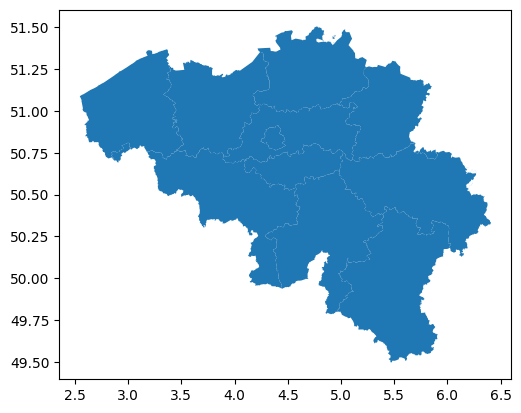

In [21]:
# show
map_df.plot()

Of course, an empty map isn't our end goal. We want to link information to this visualization. As an example, I will use incorrect, self-created data on the number of inhabitants per province. For the group assignment, you will need to look for various useful data sources on the internet.

In [22]:
# check unique province names in map_df
map_df["NE_Name"].unique()

array(['Antwerpen', 'Brussel', 'Vlaams Brabant', 'Waals Brabant',
       'West-Vlaanderen', 'Oost-Vlaanderen', 'Henegouwen', 'Luik',
       'Limburg', 'Luxemburg', 'Namen'], dtype=object)

Let's retrieve some useful data from the internet. I downloaded data regarding the inhabitant per province in belgium on the 1st of january 2021 via statbel (https://statbel.fgov.be/en/themes/population/structure-population). I saved the retrieved data in an excel file called inhabitants_prov.xlsx

In [23]:
# load self created excel file regarding inhabitant data (source: statbel)
inh_df = pd.read_excel('../data/inhabitants_prov.xlsx')

In [24]:
# show
inh_df.head()

,Province,Inhabitants
0,Antwerpen,1875524
1,Brussel,1219970
2,Limburg,880397
3,West-Vlaanderen,1203312
4,Vlaams Brabant,1162084


In [25]:
# change column to the same name and then merge both tables
inh_df = inh_df.rename(index=str, columns={'Province': 'NE_Name'})

In [26]:
# merge
map_df = map_df.merge(inh_df, on='NE_Name')

In [27]:
# show
map_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,Inhabitants
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",1875524
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",1219970
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",1162084
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",407397
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",1203312


<AxesSubplot:>

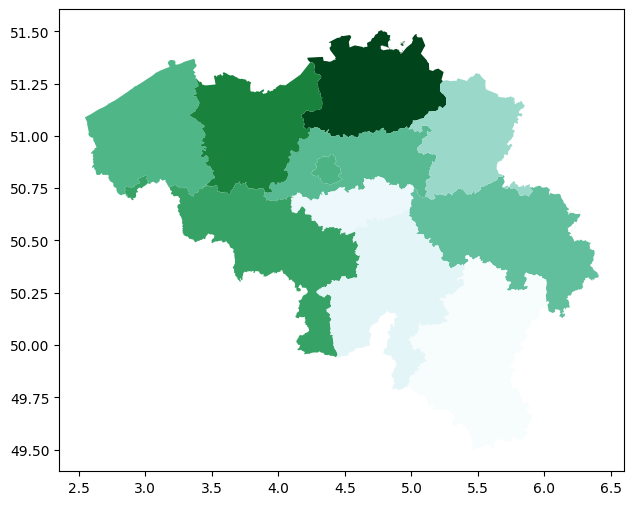

In [28]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# use cmap = 'BuGn' to get nice color-shaded plot
map_df.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax=ax)

Pretty easy right? Enjoy trying out different things as well as checking out the other .shp files provided on the URL I posted somewhere above here.

What is also useful is matplotlib layer-by-layer information. As most geospatial data is structured in lat-lon format you can just plot various geographic representations on each other. To show this, I will be plotting some large Belgian universities on our map.

In [29]:
# dictionary with location of Belgian universities
data = {'Name':  ['Ugent', 'KULeuven', 'VUB'],
        'lat': [51.046672, 50.877833, 50.822476],
        'lon': [3.727708, 4.700250, 4.394807]}

# create data frame
data_df = pd.DataFrame(data, columns = ['Name', 'lat', 'lon'])

<AxesSubplot:xlabel='lon', ylabel='lat'>

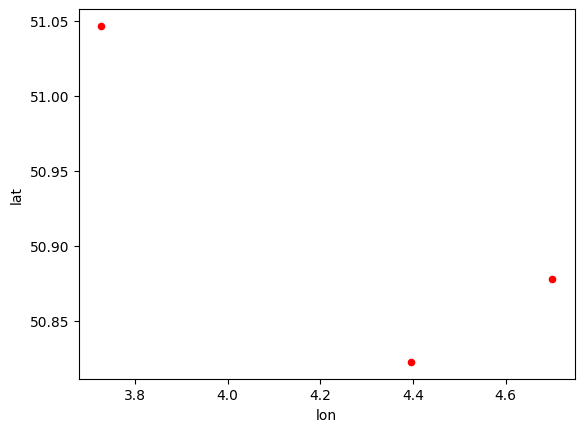

In [30]:
# plot
data_df.plot('lon', 'lat', 'scatter',  color='red')

<AxesSubplot:xlabel='lon', ylabel='lat'>

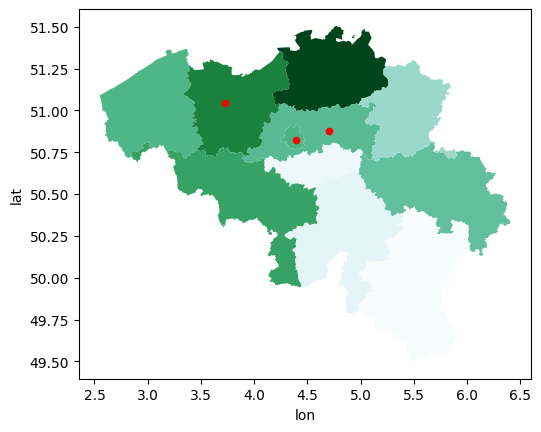

In [31]:
# overlap with our map
ax = data_df.plot('lon', 'lat', 'scatter',  color='red', zorder=2)
map_df.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax = ax, zorder = 1)